In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

In [2]:
# Define the list of ticker symbols for the companies
ticker_symbols = ['NKE', 'GS', 'JNJ', 'PFE', 'JPM']

# Define the start and end dates for the historical data
start_date = '2009-04-05'
end_date = '2019-04-05'

# Fetch the historical stock data for each company
multi_data = yf.download(ticker_symbols, start=start_date, end=end_date)
print(multi_data.head)

# Combine the stock data into a single DataFrame
stock_df = pd.DataFrame(multi_data)

# Print the first few rows of the combined DataFrame
stock_df.head()
stock_df.info()

[*********************100%%**********************]  5 of 5 completed

<bound method NDFrame.head of Price        Adj Close                                               \
Ticker              GS         JNJ        JPM        NKE        PFE   
Date                                                                  
2009-04-06   90.748932   33.579361  19.337660  10.655687   7.365040   
2009-04-07   90.305466   33.039013  18.686213  10.362638   7.257598   
2009-04-08   89.270805   33.096901  18.809650  10.441621   7.241485   
2009-04-09   96.723633   33.071175  22.457741  11.071359   7.279090   
2009-04-13  101.251328   32.903931  23.109201  11.040186   7.241485   
...                ...         ...        ...        ...        ...   
2019-03-29  169.959732  121.978859  86.648018  79.939964  33.074314   
2019-04-01  174.164642  121.272079  89.566818  80.908241  33.362465   
2019-04-02  174.837433  120.163918  89.994797  80.091858  33.416969   
2019-04-03  177.811859  119.692696  90.174545  80.186775  33.362465   
2019-04-04  179.024689  118.296577  91.045677  

In [3]:
#Creating new variables
# Calculate H-L (High minus Low price)
stock_df[('H-L','GS')] = stock_df.iloc[:,10] - stock_df.iloc[:,15]
stock_df[('H-L','JNJ')] = stock_df.iloc[:,11] - stock_df.iloc[:,16]
stock_df[('H-L','JPM')] = stock_df.iloc[:,12] - stock_df.iloc[:,17]
stock_df[('H-L','NKE')] = stock_df.iloc[:,13] - stock_df.iloc[:,18]
stock_df[('H-L','PFE')] = stock_df.iloc[:,14] - stock_df.iloc[:,19]

# Calculate O-C (Close minus Open price)
stock_df[('O-C','GS')] = stock_df.iloc[:,20] - stock_df.iloc[:,5]
stock_df[('O-C','JNJ')] = stock_df.iloc[:,21] - stock_df.iloc[:,6]
stock_df[('O-C','JPM')] = stock_df.iloc[:,22] - stock_df.iloc[:,7]
stock_df[('O-C','NKE')] = stock_df.iloc[:,23] - stock_df.iloc[:,8]
stock_df[('O-C','PFE')] = stock_df.iloc[:,24] - stock_df.iloc[:,9]


# Calculate the 7-day moving average
stock_df[('7 MA','GS')] = stock_df[('Close','GS')].rolling(window=7).mean()
stock_df[('7 MA','JNJ')] = stock_df[('Close','JNJ')].rolling(window=7).mean()
stock_df[('7 MA','JPM')] = stock_df[('Close','JPM')].rolling(window=7).mean()
stock_df[('7 MA','NKE')] = stock_df[('Close','NKE')].rolling(window=7).mean()
stock_df[('7 MA','PFE')] = stock_df[('Close','PFE')].rolling(window=7).mean()

# Calculate the 14-day moving average
stock_df[('14 MA','GS')] = stock_df[('Close','GS')].rolling(window=14).mean()
stock_df[('14 MA','JNJ')] = stock_df[('Close','JNJ')].rolling(window=14).mean()
stock_df[('14 MA','JPM')] = stock_df[('Close','JPM')].rolling(window=14).mean()
stock_df[('14 MA','NKE')] = stock_df[('Close','NKE')].rolling(window=14).mean()
stock_df[('14 MA','PFE')] = stock_df[('Close','PFE')].rolling(window=14).mean()


# Calculate the 21-day moving average
stock_df[('21 MA','GS')] = stock_df[('Close','GS')].rolling(window=21).mean()
stock_df[('21 MA','JNJ')] = stock_df[('Close','JNJ')].rolling(window=21).mean()
stock_df[('21 MA','JPM')] = stock_df[('Close','JPM')].rolling(window=21).mean()
stock_df[('21 MA','NKE')] = stock_df[('Close','NKE')].rolling(window=21).mean()
stock_df[('21 MA','PFE')] = stock_df[('Close','PFE')].rolling(window=21).mean()



# Calculate the 7-day SD
stock_df[('7 SD','GS')] = stock_df[('Close','GS')].rolling(window=7).std()
stock_df[('7 SD','JNJ')] = stock_df[('Close','JNJ')].rolling(window=7).std()
stock_df[('7 SD','JPM')] = stock_df[('Close','JPM')].rolling(window=7).std()
stock_df[('7 SD','NKE')] = stock_df[('Close','NKE')].rolling(window=7).std()
stock_df[('7 SD','PFE')] = stock_df[('Close','PFE')].rolling(window=7).std()


# Print the first few rows of the updated DataFrame with the new variables
print(stock_df.head(25))
stock_df.info()

Price        Adj Close                                                  Close  \
Ticker              GS        JNJ        JPM        NKE       PFE          GS   
Date                                                                            
2009-04-06   90.748932  33.579361  19.337660  10.655687  7.365040  116.650002   
2009-04-07   90.305466  33.039013  18.686213  10.362638  7.257598  116.080002   
2009-04-08   89.270805  33.096901  18.809650  10.441621  7.241485  114.750000   
2009-04-09   96.723633  33.071175  22.457741  11.071359  7.279090  124.330002   
2009-04-13  101.251328  32.903931  23.109201  11.040186  7.241485  130.149994   
2009-04-14   89.550842  33.045437  21.052000  10.682708  7.166276  115.110001   
2009-04-15   94.280846  33.302765  22.327452  10.830269  7.445624  121.190002   
2009-04-16   94.280846  33.579361  22.793758  11.175277  7.467109  121.190002   
2009-04-17   93.821854  34.126156  22.807467  11.349856  7.606787  120.599998   
2009-04-20   89.473038  33.7

In [4]:
#subsetting the required columns
columns_to_drop = [('Adj Close', 'GS'),('Adj Close', 'JNJ'),('Adj Close', 'JPM'),('Adj Close', 'NKE'),('Adj Close', 'PFE'),
                  ('High', 'GS'),('High', 'JNJ'),('High', 'JPM'),('High', 'NKE'),('High', 'PFE'),
                  ('Low', 'GS'),('Low', 'JNJ'),('Low', 'JPM'),('Low', 'NKE'),('Low', 'PFE'),
                  ('Open', 'GS'),('Open', 'JNJ'),('Open', 'JPM'),('Open', 'NKE'),('Open', 'PFE')]  # List of columns to drop
stock_df.drop(columns=columns_to_drop, inplace=True)

In [5]:


# Define the start and end dates for the train and test data
train_start_date = '2009-05-05'
train_end_date = '2017-04-03'
test_start_date = '2017-04-04'
test_end_date = '2019-04-05'

# Split the DataFrame into train and test data based on the dates
train_data = stock_df.loc[train_start_date:train_end_date]
test_data = stock_df.loc[test_start_date:test_end_date]

# Print the shapes of the train and test data
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

stock_df.info()

Train data shape: (1993, 40)
Test data shape: (504, 40)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2009-04-06 to 2019-04-04
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, GS)    2517 non-null   float64
 1   (Close, JNJ)   2517 non-null   float64
 2   (Close, JPM)   2517 non-null   float64
 3   (Close, NKE)   2517 non-null   float64
 4   (Close, PFE)   2517 non-null   float64
 5   (Volume, GS)   2517 non-null   int64  
 6   (Volume, JNJ)  2517 non-null   int64  
 7   (Volume, JPM)  2517 non-null   int64  
 8   (Volume, NKE)  2517 non-null   int64  
 9   (Volume, PFE)  2517 non-null   int64  
 10  (H-L, GS)      2517 non-null   float64
 11  (H-L, JNJ)     2517 non-null   float64
 12  (H-L, JPM)     2517 non-null   float64
 13  (H-L, NKE)     2517 non-null   float64
 14  (H-L, PFE)     2517 non-null   float64
 15  (O-C, GS)      2517 non-null   float64
 16  (O-C, JNJ)     2517 no

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'stock_df' is your DataFrame containing the provided variables

train_start_date = '2009-05-05'
train_end_date = '2017-04-03'
test_start_date = '2017-04-04'
test_end_date = '2019-04-05'

# Filter the DataFrame based on the specified dates
train_data = stock_df[(stock_df.index >= train_start_date) & (stock_df.index <= train_end_date)]
test_data = stock_df[(stock_df.index >= test_start_date) & (stock_df.index <= test_end_date)]
tkr = ['GS', 'JNJ', 'JPM', 'NKE', 'PFE']
ep = [300, 200, 300, 300, 300]

#len(tkr)
for i in range(len(tkr)):
    # Select the features and target variable for train and test data
    train_features = train_data[[('H-L',tkr[i]), ('O-C',tkr[i]), ('7 MA',tkr[i]), ('14 MA',tkr[i]), ('21 MA',tkr[i]), ('7 SD',tkr[i])]]
    train_target = train_data[('Close',tkr[i])]
    test_features = test_data[[('H-L',tkr[i]), ('O-C',tkr[i]), ('7 MA',tkr[i]), ('14 MA',tkr[i]), ('21 MA',tkr[i]), ('7 SD',tkr[i])]]
    test_target = test_data[('Close',tkr[i])]

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(train_features)
    X_test_scaled = scaler.transform(test_features)

    # Build the ANN model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(6, input_dim=6, activation='elu'),
        tf.keras.layers.Dense(3, activation='elu'),
        tf.keras.layers.Dense(1, activation='elu')])
    
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model epoch=300 good for all except JNJ
    model.fit(X_train_scaled, train_target, epochs=ep[i], batch_size=32, verbose=0)

    # Evaluate the model on test data
    loss = model.evaluate(X_test_scaled, test_target, verbose=0)
    print("Mean Squared Error on Test Data:", loss)

    # Predict the closing prices using the test data
    predictions = model.predict(X_test_scaled)
    
    test_data[('Predicted',tkr[i])] = predictions


C:\Users\debar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mean Squared Error on Test Data: 11.845640182495117
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


C:\Users\debar\AppData\Local\Temp\ipykernel_15580\3128114543.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[('Predicted',tkr[i])] = predictions
C:\Users\debar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mean Squared Error on Test Data: 4.358940124511719
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\debar\AppData\Local\Temp\ipykernel_15580\3128114543.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[('Predicted',tkr[i])] = predictions
C:\Users\debar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mean Squared Error on Test Data: 2.305534839630127
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


C:\Users\debar\AppData\Local\Temp\ipykernel_15580\3128114543.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[('Predicted',tkr[i])] = predictions
C:\Users\debar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mean Squared Error on Test Data: 1.3086663484573364
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


C:\Users\debar\AppData\Local\Temp\ipykernel_15580\3128114543.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[('Predicted',tkr[i])] = predictions
C:\Users\debar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mean Squared Error on Test Data: 0.18064893782138824
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


C:\Users\debar\AppData\Local\Temp\ipykernel_15580\3128114543.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[('Predicted',tkr[i])] = predictions


In [7]:
rmse,mape,mbe=np.zeros(5),np.zeros(5),np.zeros(5)
tkr = ['GS', 'JNJ', 'JPM', 'NKE', 'PFE']
for i in range(len(tkr)):
    of = test_data[('Close',tkr[i])] - test_data[('Predicted',tkr[i])]
    rmse[i]=np.sqrt(np.sum(of**2)/len(of))
    mape[i]=(np.sum(np.abs(of/test_data[('Close',tkr[i])]))/len(of))*100
    mbe[i]=np.mean(of)
print(rmse)
print(mape)
print(mbe)

[3.44157421 2.09139771 1.5018389  1.13578922 0.42550001]
[1.1945261  1.23162369 1.02546478 1.15654236 0.80798493]
[ 0.52527779  1.3427223  -0.31807869 -0.01018761  0.0577817 ]


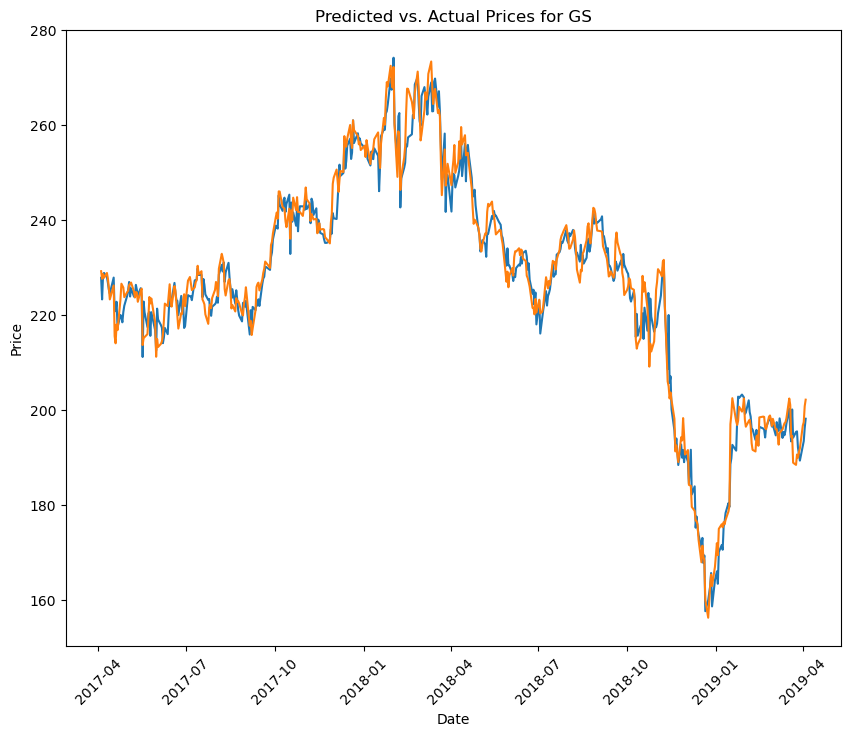

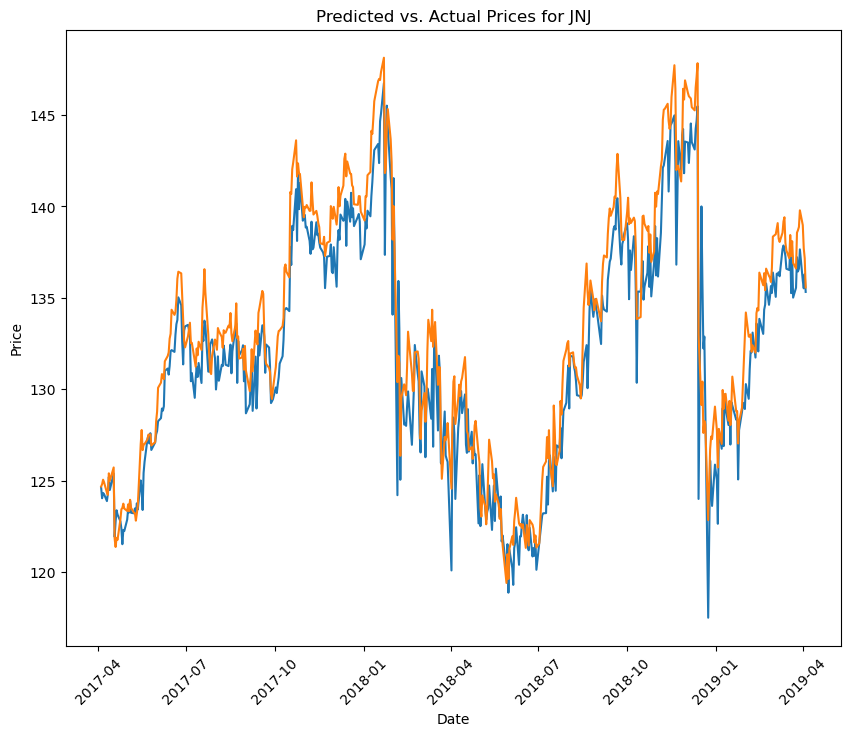

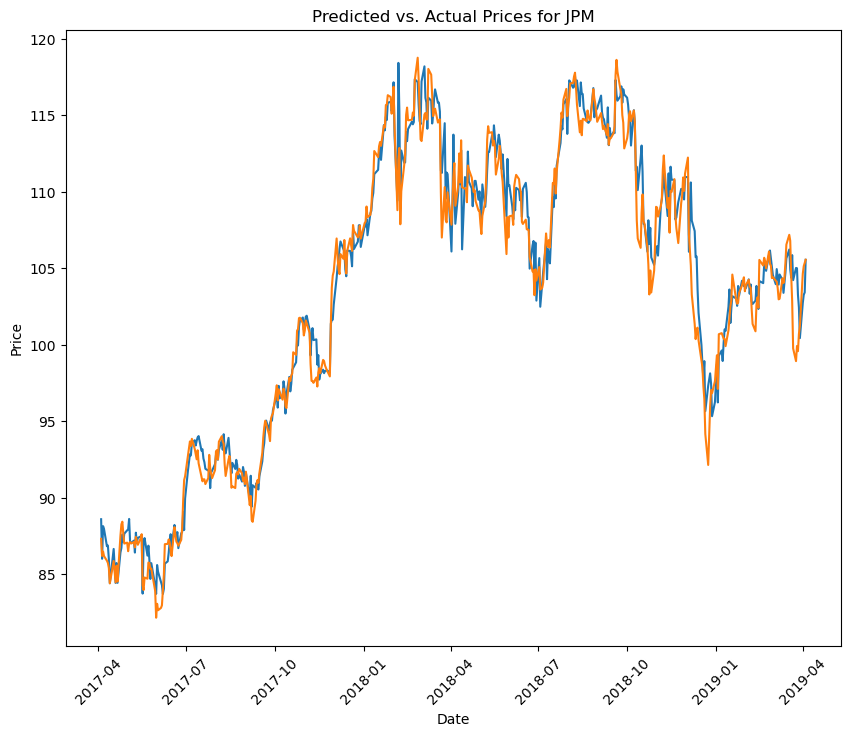

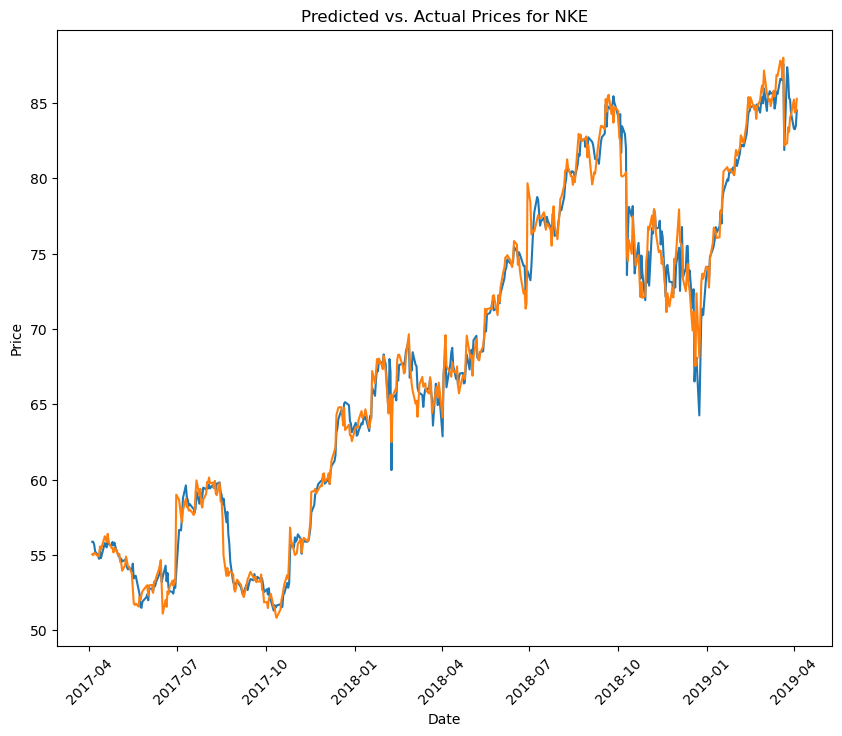

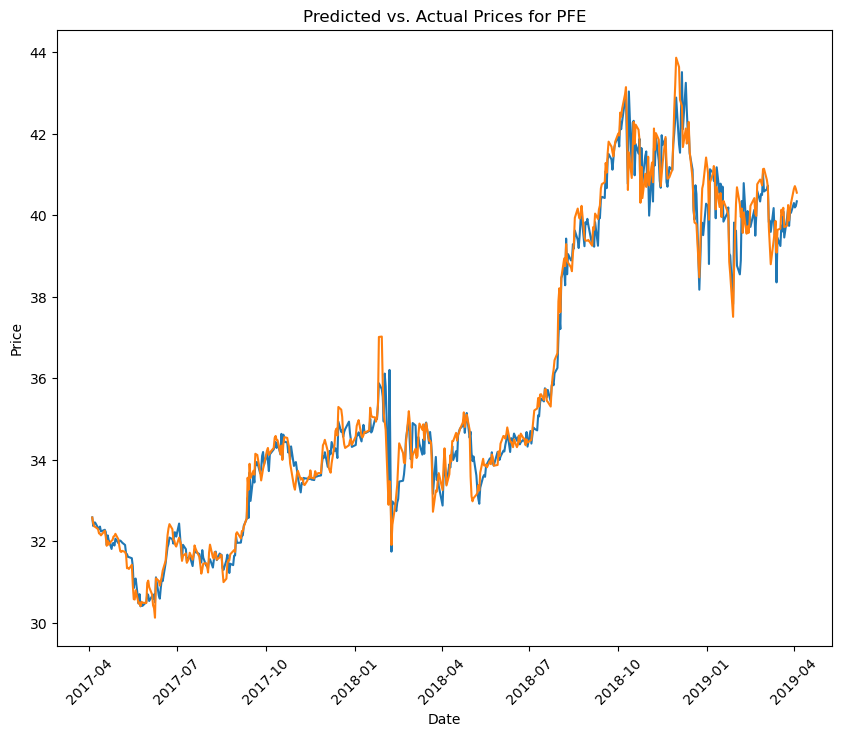

In [20]:
import matplotlib.pyplot as plt
for i in range(len(tkr)):
    plt.figure(figsize=(10, 8))
    plt.plot(test_data[('Predicted', tkr[i])], label='Predicted')
    plt.plot(test_data[('Close', tkr[i])], label='Actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Predicted vs. Actual Prices for {tkr[i]}')
    plt.xticks(rotation=45)
    
    plt.savefig(f'plot_{tkr[i]}_ANN.jpg')
    plt.show()

In [8]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

train_data1 = stock_df[(stock_df.index >= train_start_date) & (stock_df.index <= train_end_date)]
test_data1 = stock_df[(stock_df.index >= test_start_date) & (stock_df.index <= test_end_date)]
tkr = ['GS', 'JNJ', 'JPM', 'NKE', 'PFE']

for i in range(len(tkr)):
    train_features = train_data1[[('H-L', tkr[i]), ('O-C', tkr[i]), ('7 MA', tkr[i]), ('14 MA', tkr[i]), ('21 MA', tkr[i]), ('7 SD', tkr[i])]]
    train_target = train_data1[('Close', tkr[i])]
    test_features = test_data1[[('H-L', tkr[i]), ('O-C', tkr[i]), ('7 MA', tkr[i]), ('14 MA', tkr[i]), ('21 MA', tkr[i]), ('7 SD', tkr[i])]]
    test_target = test_data1[('Close', tkr[i])]

    rf = RandomForestRegressor(n_estimators=100, max_features=5, max_depth=200).fit(train_features, train_target)
    
    prediction = rf.predict(test_features)
    test_data1[('Predicted', tkr[i])] = prediction


C:\Users\debar\AppData\Local\Temp\ipykernel_15580\40739124.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1[('Predicted', tkr[i])] = prediction
C:\Users\debar\AppData\Local\Temp\ipykernel_15580\40739124.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1[('Predicted', tkr[i])] = prediction
C:\Users\debar\AppData\Local\Temp\ipykernel_15580\40739124.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [50]:
rmse, mape, mbe = np.zeros(5), np.zeros(5), np.zeros(5)
for i in range(len(tkr)):
    of = test_data1[('Close', tkr[i])] - test_data1[('Predicted', tkr[i])]
    rmse[i] = np.sqrt(np.sum(of**2) / len(of))
    mape[i] = (np.sum(np.abs(of / test_data1[('Close', tkr[i])])) / len(of)) * 100
    mbe[i] = np.mean(of)
print(rmse)
print(mape)
print(mbe)

[ 9.4228173   9.73938056 15.35097037  9.43983278  3.58838823]
[ 3.240618    5.66337962 11.8128078   8.28633304  5.62753756]
[-2.43514915  7.55878738 12.58632412  6.18360239  2.10829861]


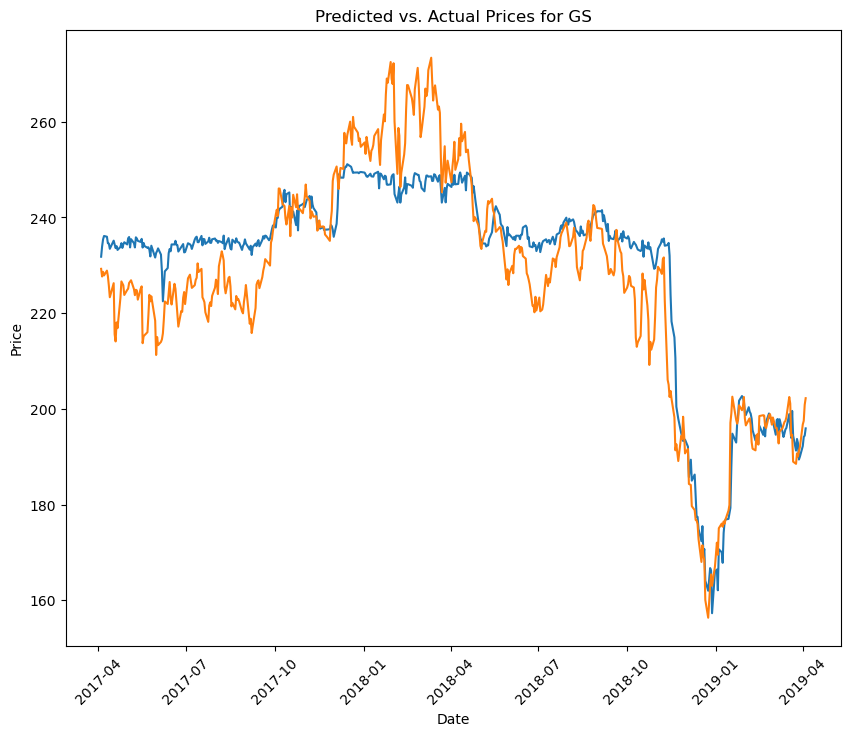

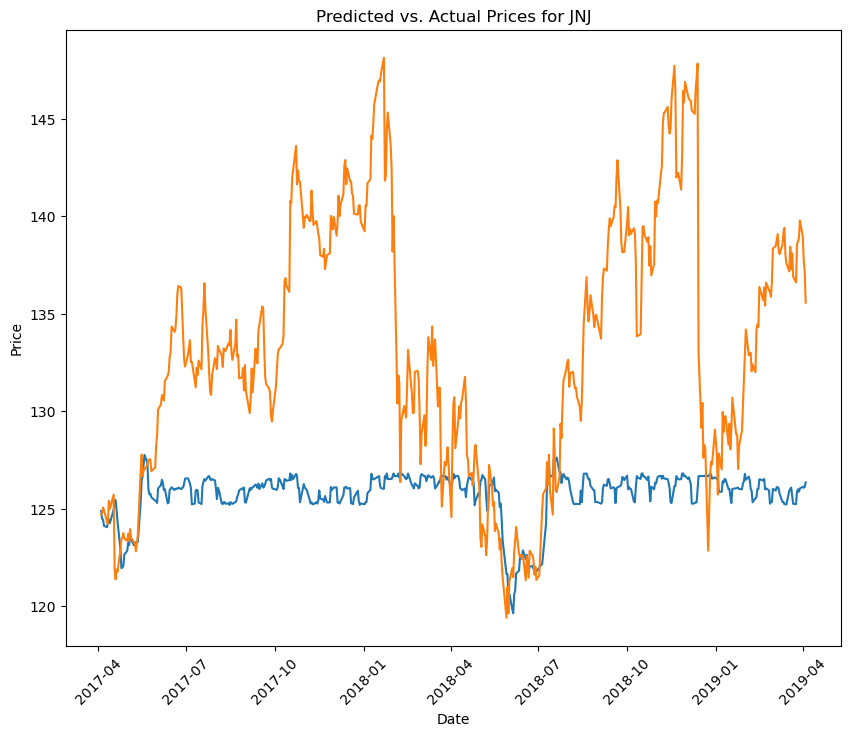

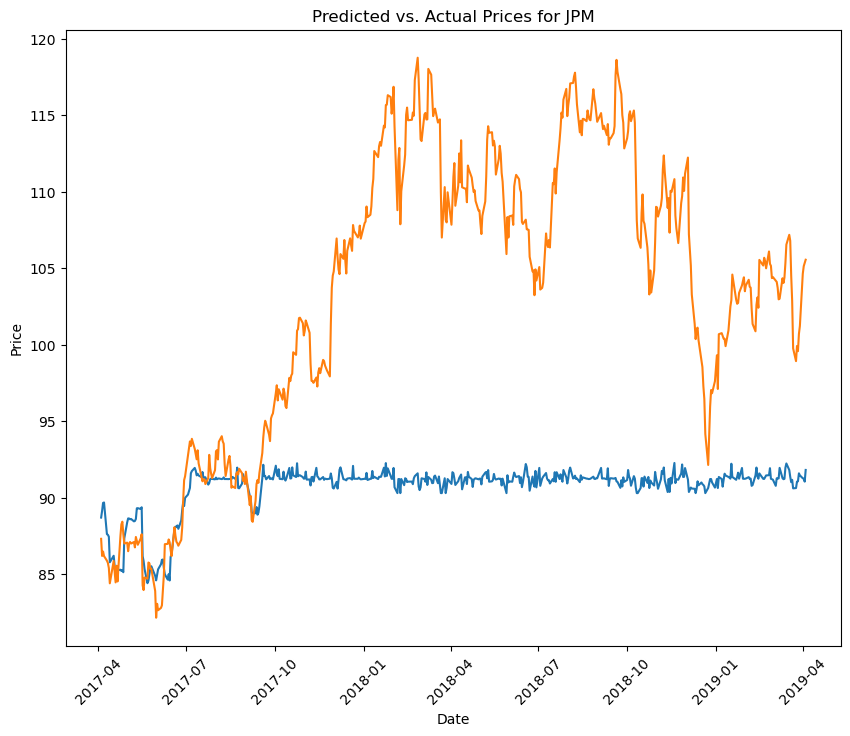

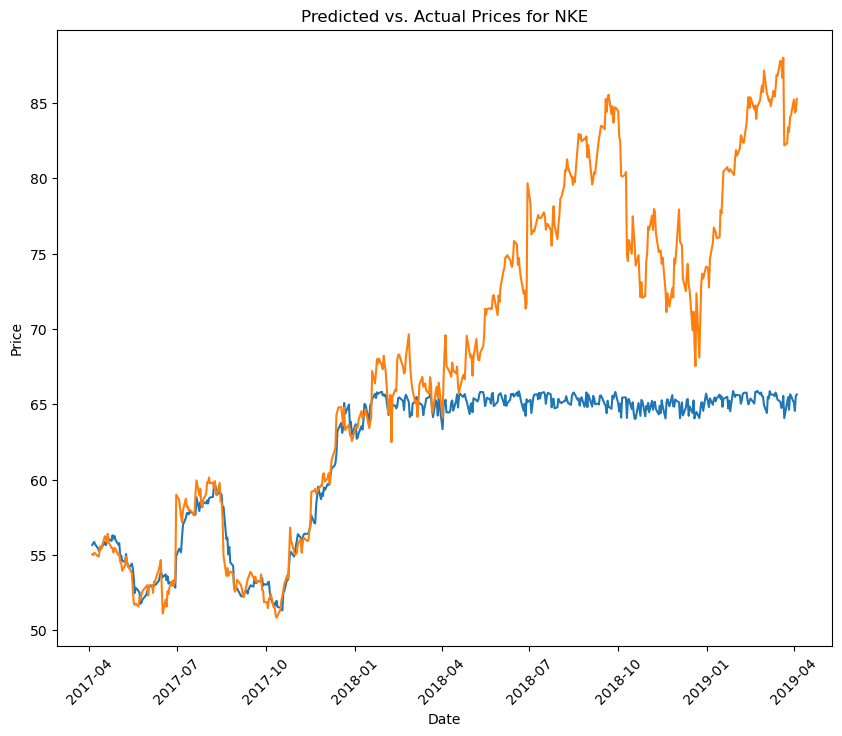

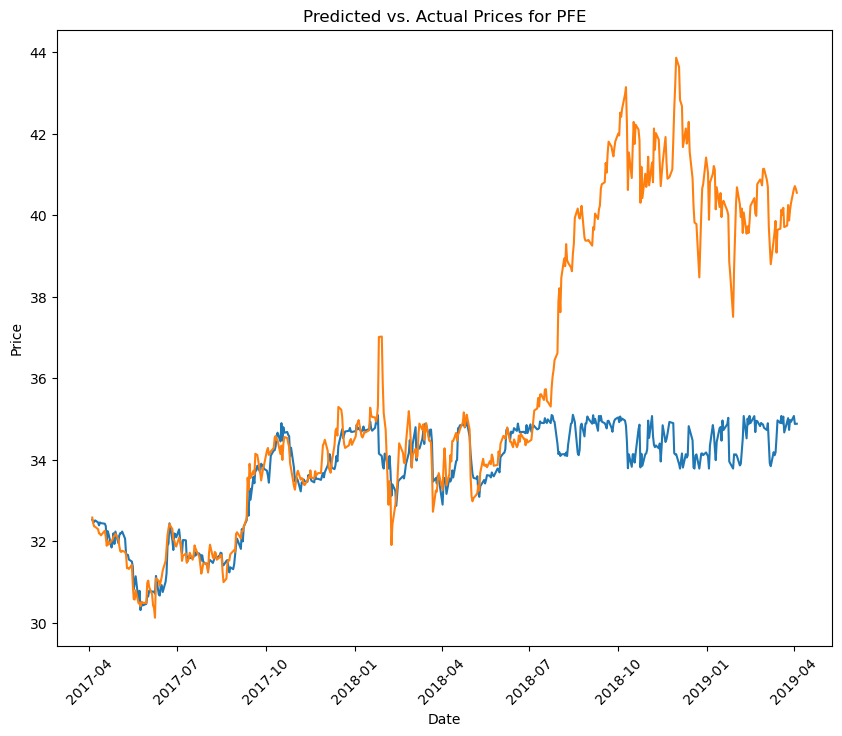

In [19]:
import matplotlib.pyplot as plt
for i in range(len(tkr)):
    plt.figure(figsize=(10, 8))
    plt.plot(test_data1[('Predicted', tkr[i])], label='Predicted')
    plt.plot(test_data1[('Close', tkr[i])], label='Actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Predicted vs. Actual Prices for {tkr[i]}')
    plt.xticks(rotation=45)
    
    plt.savefig(f'plot_{tkr[i]}_RM.jpg')
    plt.show()

# BUYING & SELLING STRATEGY

## Basic Buying Protocol:

### - Buy if stock increasing for $4$ consecutive days

## Basic Selling Protocols:

### - Sell if stock decreasing for $1$ consecutive days (and we've made a profit)

In [21]:
def get_buying_selling_days(price_data, b, s):
    
    #get the percent change day after day
    pct_change = price_data.pct_change()[1:]
    
    #this function checks the buying condition
    def buying_condition(sub_series):
        return (sub_series > 0).all()
    
    #this function checks the selling condition
    def selling_condition(sub_series):
        return (sub_series < 0).all()
    
    #get all buying days in the data
    buying_days = pct_change.rolling(b).apply(buying_condition)
    
    #get all potential selling days in the data
    potential_selling_days = pct_change.rolling(s).apply(selling_condition)
    
    #return a dictionary
    return {'buying_days': buying_days, 'potential_selling_days': potential_selling_days}

### Functions

In [22]:
def check_cumulative_percent_change(price_data, buy_date, potential_sell_date):
    """
    This helper function will check if the cumulative percent change
    between a buying and potential selling day yields overall growth
    """
    
    #get the percent change day after day
    pct_change = price_data.pct_change()[1:]
    
    sub_series = 1 + pct_change[buy_date + timedelta(hours=1): potential_sell_date]

    return sub_series.product() > 1

In [31]:
def get_investing_result(df_stocks, starting_funds, verbose=False):
    
    #get a copy of price data
    price_data = df_stocks.price
    
    #at start, not holding any shares
    holding = False
    
    #init vars
    current_funds = starting_funds
    current_shares = 0
    last_buy_date = None
    
    #init dict of buying and selling dates
    events_list = []
    
    #for each buying day and potential selling day. Here ap is the acutal price
    for date,data in df_stocks.iterrows():
        
        #if not currently holding shares, and this is a buying day...
        if (not holding) and data.buying_day:
            
            #calculate the number of shares we can buy
            num_shares_to_buy = int(current_funds / data.Aprice)
            
            #update number of shares
            current_shares += num_shares_to_buy
            
            #decrease current funds
            current_funds -= num_shares_to_buy * data.Aprice
            
            #set last buy date
            last_buy_date = date
            events_list.append(('b', date))
            
            #we are now holding shares
            holding = True
            
            if verbose:
                print('Bought %s shares at $%s on %s totaling $%s'%(num_shares_to_buy, data.price, date.date(), round(num_shares_to_buy*data.price,2)))
        
        #if you are holding shares, and this is a potential selling day...
        elif holding and data.potential_selling_day:
            
            #check to make sure we're making a profit
            if check_cumulative_percent_change(price_data, last_buy_date, date):
                #add to our current funds
                current_funds += current_shares * data.Aprice
                
                if verbose:
                    print('Sold %s shares at $%s on %s totaling $%s'%(current_shares, data.Aprice, date.date(), round(num_shares_to_buy*data.Aprice,2)))
                    print('--------------------------------------')
                    
                #reset current shares
                current_shares = 0
                
                #we are no longer holding shares
                holding = False
                
                events_list.append(('s', date))
                
    #get the stock price at the end of the time span
    final_stock_price = price_data[-1]
        
    #get the final total value of all assets (funds + stock value)
    final_value = current_funds + final_stock_price * current_shares
    
    #return the percent change in value
    return round((final_value - starting_funds) / starting_funds,2), events_list

In [32]:
for i in range(len(tkr)):
    priceData = test_data[('Predicted', tkr[i])]
    info_dict = get_buying_selling_days(priceData, 4, 1) #ANN
    
    buying_days = info_dict['buying_days']
    potential_selling_days = info_dict['potential_selling_days']
    
    df_stocks = pd.DataFrame(index = buying_days.index)
    
    #populate df with buying days, possible selling days, and price
    df_stocks['buying_day'] = (buying_days == 1)
    df_stocks['potential_selling_day'] = (potential_selling_days == 1)
    df_stocks['price'] = priceData
    df_stocks['Aprice'] = test_data[('Close', tkr[i])] # the acutal price of the stocks

    #only keep days that are buying or possible selling days
    df_stocks = df_stocks[(df_stocks.buying_day | df_stocks.potential_selling_day)]
    
    percent_change, events_list = get_investing_result(df_stocks, 10000, True)
    
    print(percent_change)
    print("_____________________________________________________________________________________________________")

Bought 44 shares at $225.30926513671875 on 2017-05-02 totaling $9913.61
Sold 44 shares at $224.75999450683594 on 2017-05-11 totaling $9889.44
--------------------------------------
Bought 44 shares at $223.8943328857422 on 2017-08-02 totaling $9851.35
Sold 44 shares at $232.0500030517578 on 2017-08-08 totaling $10210.2
--------------------------------------
Bought 44 shares at $230.1669921875 on 2017-09-21 totaling $10127.35
Sold 44 shares at $241.6199951171875 on 2017-10-03 totaling $10631.28
--------------------------------------
Bought 39 shares at $269.8217468261719 on 2018-01-29 totaling $10523.05
-0.22
_____________________________________________________________________________________________________
Bought 78 shares at $127.4623794555664 on 2017-05-23 totaling $9942.07
Sold 78 shares at $130.75 on 2017-06-07 totaling $10198.5
--------------------------------------
Bought 75 shares at $135.02896118164062 on 2017-06-23 totaling $10127.17
Sold 75 shares at $140.67999267578125 on 

In [33]:
for i in range(len(tkr)):
    priceData = test_data1[('Predicted', tkr[i])]
    info_dict1 = get_buying_selling_days(priceData, 4, 1) #RF
    
    buying_days = info_dict['buying_days']
    potential_selling_days = info_dict['potential_selling_days']
    
    df_stocks = pd.DataFrame(index = buying_days.index)
    
    #populate df with buying days, possible selling days, and price
    df_stocks['buying_day'] = (buying_days == 1)
    df_stocks['potential_selling_day'] = (potential_selling_days == 1)
    df_stocks['price'] = priceData
    df_stocks['Aprice'] = test_data1[('Close', tkr[i])] # the acutal price of the stocks

    #only keep days that are buying or possible selling days
    df_stocks = df_stocks[(df_stocks.buying_day | df_stocks.potential_selling_day)]
    
    percent_change, events_list = get_investing_result(df_stocks, 10000, True)
    
    print(percent_change)
    print("_____________________________________________________________________________________________________")

Bought 45 shares at $234.19790130615235 on 2017-06-22 totaling $10538.91
Sold 45 shares at $228.0399932861328 on 2017-07-05 totaling $10261.8
--------------------------------------
Bought 42 shares at $245.03610107421875 on 2017-10-10 totaling $10291.52
Sold 42 shares at $242.41000366210938 on 2017-10-16 totaling $10181.22
--------------------------------------
Bought 42 shares at $238.1732992553711 on 2017-11-29 totaling $10003.28
Sold 42 shares at $250.64999389648438 on 2017-12-04 totaling $10527.3
--------------------------------------
Bought 40 shares at $246.6001005554199 on 2018-02-20 totaling $9864.0
Sold 40 shares at $267.92999267578125 on 2018-02-27 totaling $10717.2
--------------------------------------
Bought 44 shares at $248.314600982666 on 2018-04-23 totaling $10925.84
-0.14
_____________________________________________________________________________________________________
Bought 73 shares at $126.01620254516601 on 2017-06-22 totaling $9199.18
Sold 73 shares at $135.00